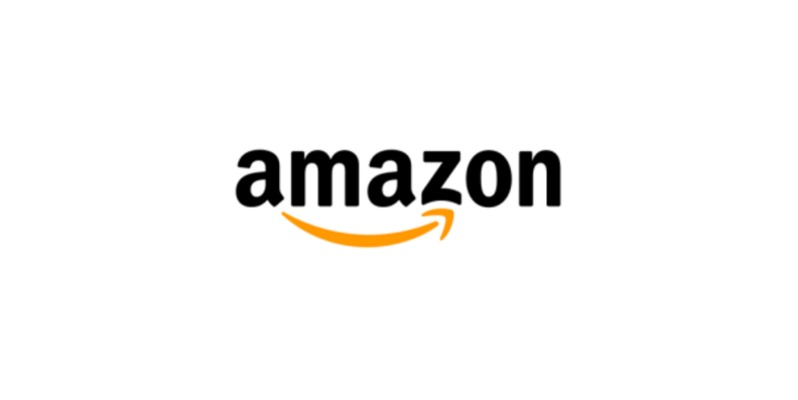

<div style="background-color: #fad2cf; padding: 20px; border-radius: 15px; border: 5px solid #420b08; margin-top: 20px;">
  <p style="text-align: center; font-family: 'Arial', sans-serif; font-size: 30px; color: #420b08; font-weight: bold;">📘 Introduction to Amazon Product Dataset Analysis</p>
  
  <ul style="font-family: 'Georgia', serif; font-size: 14px; color: #420b08; margin-left: 20px;">
    
<li><strong>📘 Dataset Description:</strong>
      <ul>
        <li>This dataset contains detailed information about <strong>Amazon products, pricing, discount patterns, ratings, reviews, and metadata</strong>.</li>
        <li>It includes more than <strong>1,000 product listings</strong>, scraped from Amazon’s website using <strong>BeautifulSoup</strong> and <strong>WebDriver</strong>.</li>
        <li><strong>Key Features:</strong>
          <ul>
            <li><code>product_id</code> → Unique identifier for each product</li>
            <li><code>product_name</code> → Name of the product</li>
            <li><code>category</code> → Product category (e.g., electronics, clothing)</li>
            <li><code>discounted_price</code> → Final discounted price</li>
            <li><code>actual_price</code> → Original listed price</li>
            <li><code>discount_percentage</code> → Discount applied in percentage</li>
            <li><code>rating</code> → Average customer rating</li>
            <li><code>rating_count</code> → Number of customers who rated</li>
            <li><code>about_product</code> → Short description</li>
            <li><code>user_id</code>, <code>user_name</code> → Reviewer details</li>
            <li><code>review_id</code>, <code>review_title</code>, <code>review_content</code> → Review details</li>
            <li><code>img_link</code>, <code>product_link</code> → Product image & official link</li>
          </ul>
        </li>
        <li>📌 <strong>Source:</strong> Scraped from Amazon official website</li>
        <li>📌 <strong>License:</strong> CC BY-NC-SA 4.0</li>
      </ul>
    </li>
    
 
 <li><strong>💡 Business Problem Statement:</strong>
      <ul>
        <li>E-commerce platforms generate massive amounts of data every day.</li>
        <li>Key challenge: <strong>Understanding what drives product sales</strong>.</li>
        <li><strong>This dataset allows us to:</strong>
          <ul>
            <li>Analyze the <strong>impact of discounts, pricing, and reviews</strong></li>
            <li>Identify <strong>top-performing categories & products</strong></li>
            <li>Study how <strong>ratings & customer feedback</strong> influence decisions</li>
            <li>Explore <strong>sales performance patterns</strong> to support strategy</li>
          </ul>
        </li>
      </ul>
    </li>
    
 <li><strong>🎯 Goals of the Analysis:</strong>
      <ul>
        <li>Perform <strong>exploratory data analysis (EDA)</strong> on products, prices & reviews</li>
        <li>Visualize patterns & <strong>relationships between attributes and interest</strong></li>
        <li>Identify <strong>key drivers of product performance</strong></li>
        <li>Build <strong>predictive models</strong> for forecasting/classification</li>
        <li>Provide <strong>actionable insights</strong> to optimize <strong>pricing & marketing strategies</strong></li>
      </ul>
    </li>
    
<li><strong>📌 Summary:</strong>
      <ul>
        <li>Dataset offers a detailed look into <strong>Amazon product listings</strong>.</li>
        <li>Helps analyze <strong>discounts, pricing, ratings, and reviews</strong>.</li>
        <li>Supports sellers & businesses in <strong>data-driven decisions</strong>.</li>
        <li>Enables predictive modeling for <strong>future product performance</strong>.</li>
      </ul>
    </li>
    
  </ul>
</div>


# <p style="font-family: 'Amiri'; font-size: 3rem; color: #420b08; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:95%">📦 Data Loading & Initial Examination</p>

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #420b08; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:95%">🔹 Import Required Libraries</p>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

# show plots inside notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Paellete
palette = ['#420b08', '#fad2cf']
color_palette = sns.color_palette(palette)

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #420b08; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:95%">🔹 Load Dataset</p>

In [47]:
# Load CSV file into DataFrame
df = pd.read_csv("/kaggle/input/amazon-sales-dataset/amazon.csv")

# display shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 1465 rows and 16 columns.


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #420b08; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:95%">🔹 Preview First Few Rows</p>

In [48]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #420b08; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:95%">🔹 Column Names & Data Types</p>

In [49]:
# check column names
print("Column Names:", df.columns.tolist())

# check detailed info
df.info()

Column Names: ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   objec

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #420b08; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:95%">🔹 Missing Values Overview</p>

In [50]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

<div style="background-color: #fad2cf; padding: 20px; border-radius: 15px; border: 5px solid #420b08; margin-top: 20px;">
  <p style="text-align: center; font-family: 'Georgia', serif; font-size: 26px; color: #420b08; font-weight: bold;">📍 Observations</p>
  
  <ul style="font-family: 'Georgia', serif; font-size: 14px; color: #420b08; margin-left: 20px;">
    <li>The dataset contains <strong>1465 rows and 16 columns</strong>.</li>
    <li>Most columns are stored as <strong>object (string) type</strong>, which may require transformation later.</li>
    <li>Columns include <strong>product details, pricing, discounts, ratings, reviews, and links</strong>.</li>
    <li>Some columns have <strong>missing values</strong> that will be addressed during preprocessing.</li>
  </ul>
</div>


# <p style="font-family: 'Amiri'; font-size: 3rem; color: #420b08; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:95%"> Data Cleaning & Preprocessing</p>

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #420b08; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:95%">🔹 Convert Data Types</p>

In [51]:
# Convert prices to float
df['discounted_price'] = (
    df['discounted_price'].str.replace("₹", "").str.replace(",", "").astype(float)
)
df['actual_price'] = (
    df['actual_price'].str.replace("₹", "").str.replace(",", "").astype(float)
)

# Convert discount percentage to fraction
df['discount_percentage'] = (
    df['discount_percentage'].str.replace("%", "").astype(float) / 100
)

# Clean & convert ratings
df['rating'] = df['rating'].replace("|", "3.9").astype(float)

# Convert rating_count to numeric
df['rating_count'] = df['rating_count'].str.replace(",", "").astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #420b08; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:95%">🔹 Handling Missing Values</p>

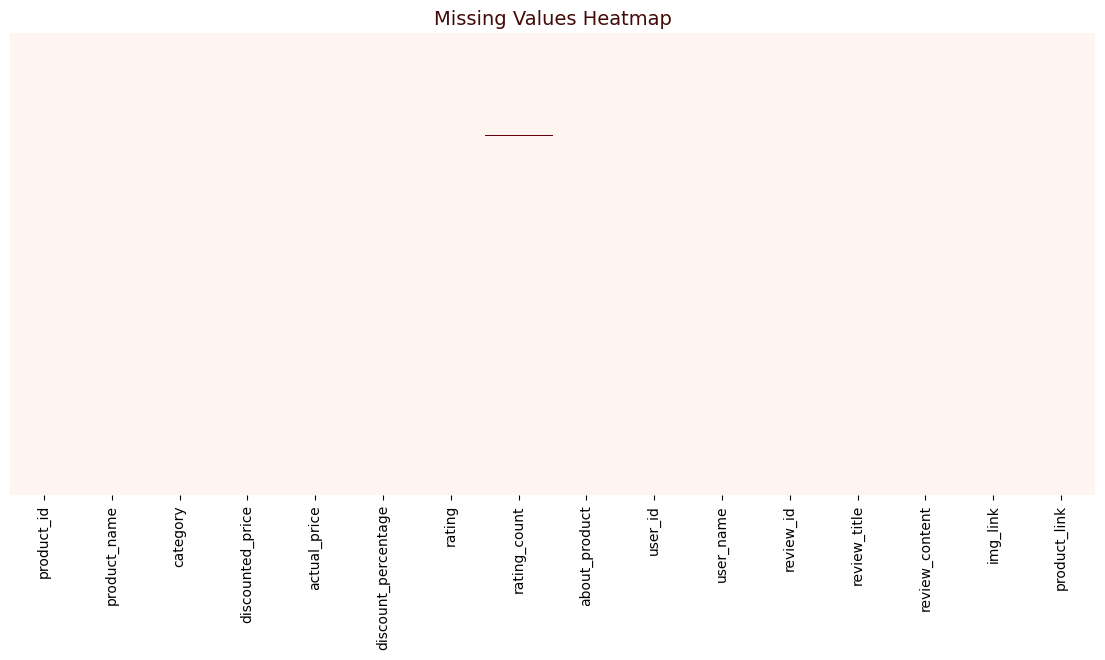

Missing values after imputation:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [52]:
# Check nulls
df.isnull().sum().sort_values(ascending=False)

# Visualize missing values
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds", yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=14, color="#420b08")
plt.show()

# Impute missing values in rating_count with median
df['rating_count'].fillna(df['rating_count'].median(), inplace=True)

print("Missing values after imputation:\n", df.isnull().sum())

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #420b08; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:95%">🔹 Check for Duplicates</p>

In [53]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #420b08; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:95%">🔹 Descriptive Statistics</p>

In [54]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,0.476915,4.096451,18277.634812
std,6944.304394,10874.826864,0.216359,0.291620,42727.398216
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1191.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17325.000000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


<div style="background-color: #fad2cf; padding: 20px; border-radius: 15px; border: 5px solid #420b08; margin-top: 20px;">
  <p style="text-align: center; font-family: 'Georgia', serif; font-size: 26px; color: #420b08; font-weight: bold;">📍 Observations</p>
  
  <ul style="font-family: 'Georgia', serif; font-size: 14px; color: #420b08; margin-left: 20px;">
    
 <li>Initially, all key numeric columns (<code>discounted_price, actual_price, discount_percentage, rating, rating_count</code>) were stored as <strong>object</strong> type.<br>
    ✅ Converted to <strong>float64</strong>, making them suitable for analysis.</li>
    
 <li>During cleaning, an unusual value <code>"|"</code> was found in the <strong>rating</strong> column.<br>
    Verified on Amazon (via <code>product_id</code>) → true rating <strong>3.9</strong>.<br>
    👉 Ensures <strong>accuracy</strong> by validating against the source instead of dropping/guessing values.</li>
    
<li><strong>Discount Percentage</strong> values standardized into fractions (e.g., <code>25% → 0.25</code>) for consistent interpretation in modeling.</li>
    
  <li><strong>rating_count</strong> column had missing values + formatting issues (commas in numbers).<br>
      - Missing values imputed using <strong>median</strong> (robust against outliers).</li>
    
<li>After handling missing data:<br>
      ✅ <strong>Milestone 1:</strong> Dataset is now <strong>free from null values</strong>.</li>
    
<li>No duplicate records were found:<br>
      ✅ <strong>Milestone 2:</strong> Dataset contains <strong>unique entries only</strong>.</li>
    
<li>Overall, the dataset is now <strong>clean, consistent, and analysis-ready</strong> for visualization & feature exploration.</li>
  
  </ul>
</div>


# <p style="font-family: 'Amiri'; font-size: 3rem; color: #420b08; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:95%">📊 Data Visualization</p>

<div style="font-family: 'Amiri'; color: #420b08; text-align: center; 
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; 
padding: 5px; border-radius: 20px; border: 8px solid #420b08; width:50%">

  <p style="font-size: 1.5rem; margin: 0; font-weight: bold;">🔹 Univariate Analysis</p>
  <p style="font-size: 1.4rem; margin-top: 10px;">Distribution of Numerical Feature</p>

</div>


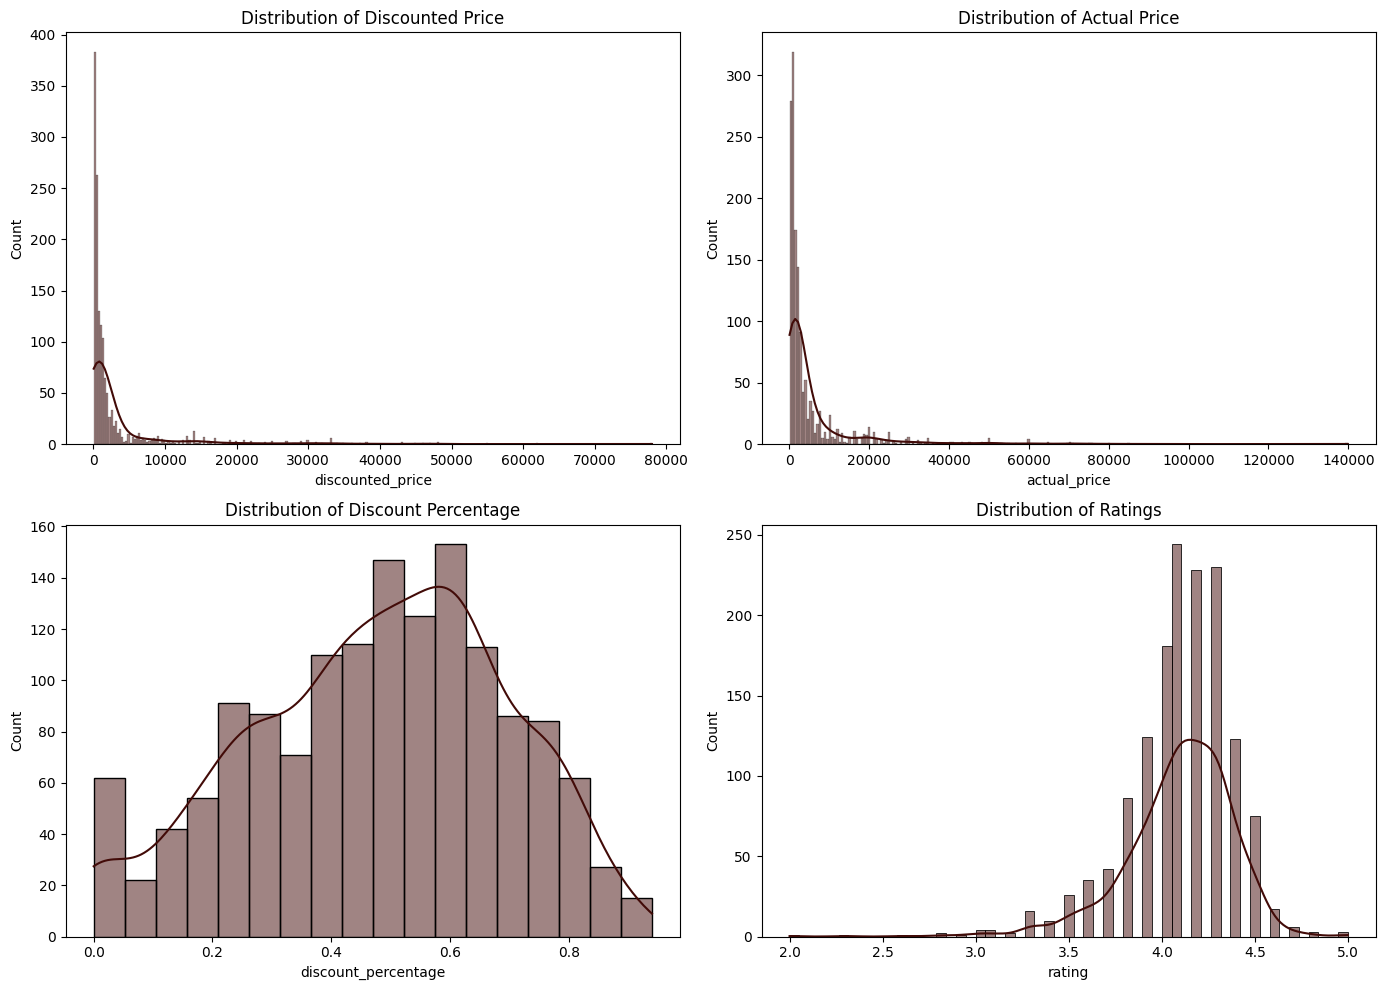

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['discounted_price'], kde=True, ax=axes[0,0], color="#420b08")
axes[0,0].set_title("Distribution of Discounted Price")

sns.histplot(df['actual_price'], kde=True, ax=axes[0,1], color="#420b08")
axes[0,1].set_title("Distribution of Actual Price")

sns.histplot(df['discount_percentage'], kde=True, ax=axes[1,0], color="#420b08")
axes[1,0].set_title("Distribution of Discount Percentage")

sns.histplot(df['rating'], kde=True, ax=axes[1,1], color="#420b08")
axes[1,1].set_title("Distribution of Ratings")

plt.tight_layout()
plt.show()

# <p style="font-family: 'Amiri'; font-size: 1.8rem; color: #420b08; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:50%">Count of Rating</p>

### Count of Rating

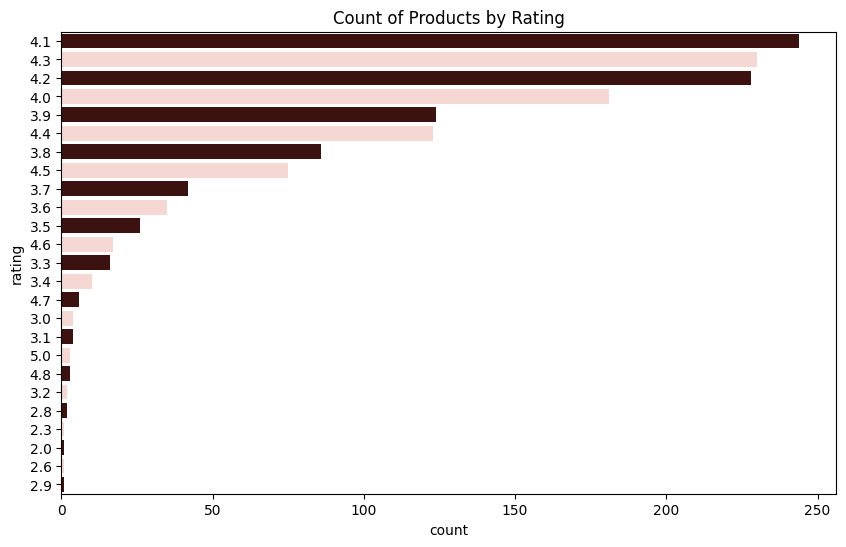

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette=palette)
plt.title("Count of Products by Rating")
plt.show()

<div style="font-family: 'Amiri'; color: #420b08; text-align: center; 
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; 
padding: 5px; border-radius: 20px; border: 8px solid #420b08; width:50%">

  <p style="font-size: 1.5rem; margin: 0; font-weight: bold;">🔹 Bivariate Analysis</p>
  <p style="font-size: 1.4rem; margin-top: 10px;">Price vs Rating</p>

</div>


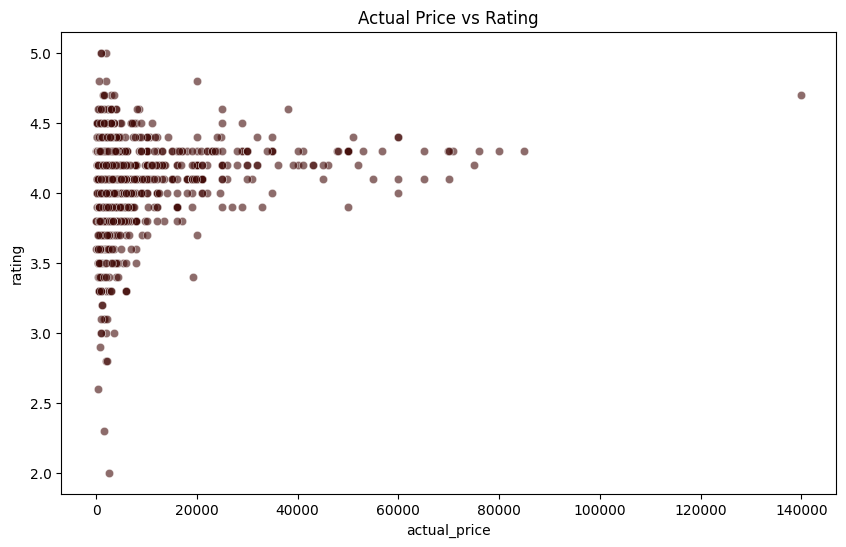

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="actual_price", y="rating", data=df, alpha=0.6, color='#420b08')
plt.title("Actual Price vs Rating")
plt.show()

<div style="font-family: 'Amiri'; color: #420b08; text-align: center; 
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; 
padding: 5px; border-radius: 20px; border: 8px solid #420b08; width:50%">

  <p style="font-size: 1.5rem; margin: 0; font-weight: bold;">🔹 Advanced Visualization</p>
  <p style="font-size: 1.4rem; margin-top: 10px;">Correlation Heatmap</p>

</div>

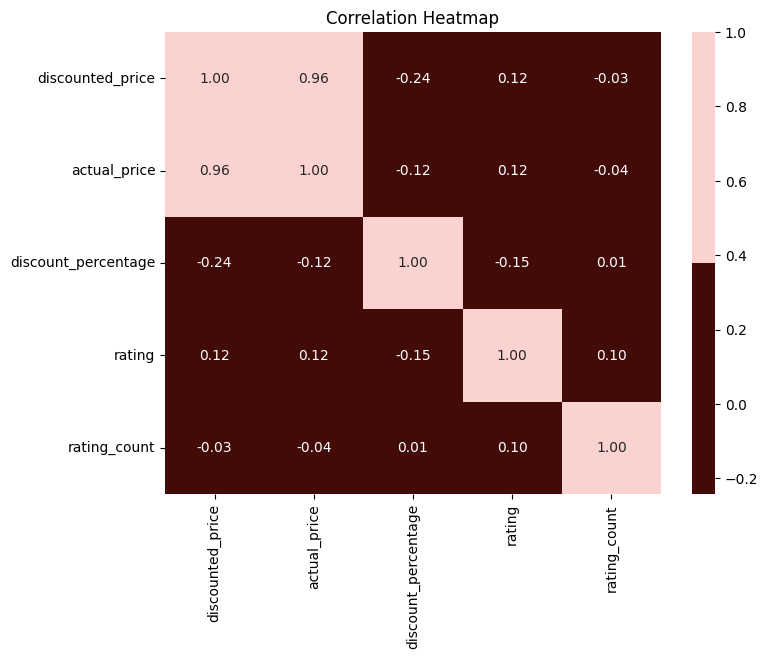

In [58]:
plt.figure(figsize=(8,6))
corr = df[['discounted_price','actual_price','discount_percentage','rating','rating_count']].corr()
sns.heatmap(corr, annot=True, cmap=palette, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# <p style="font-family: 'Amiri'; font-size: 1.8rem; color: #420b08; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:50%">Share of Products by Rating</p>

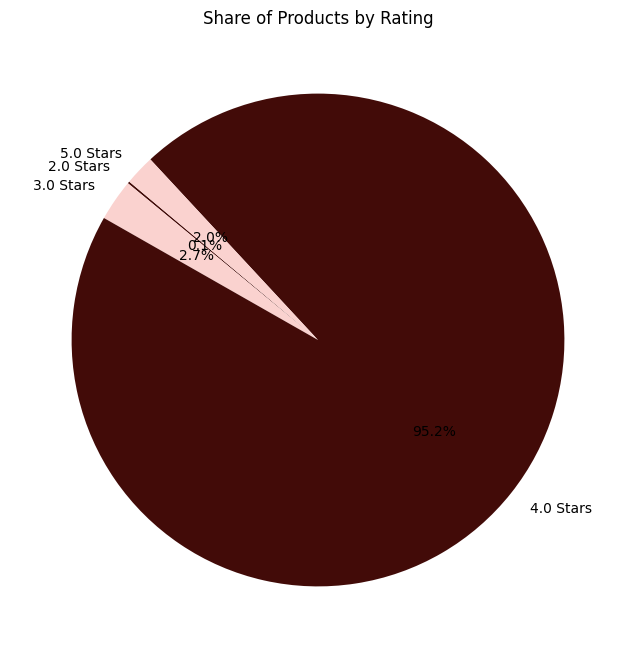

In [59]:
# Round ratings to nearest integer for clean grouping
df['rating_rounded'] = df['rating'].round()

rating_share = df['rating_rounded'].value_counts().sort_index()

plt.figure(figsize=(8,8))
plt.pie(rating_share, labels=rating_share.index.astype(str) + " Stars", 
        autopct="%1.1f%%", startangle=140, colors=color_palette)
plt.title("Share of Products by Rating")
plt.show()

<div style="background-color: #fad2cf; padding: 20px; border-radius: 15px; border: 5px solid #420b08; margin-top: 20px;">
  <p style="text-align: center; font-family: 'Arial', sans-serif; font-size: 30px; color: #420b08; font-weight: bold;">📝 Observations from Visualizations</p>
  
  <ul style="font-family: 'Georgia', serif; font-size: 14px; color: #420b08; margin-left: 20px;">
    
<li><strong>Distribution of Prices (Discounted & Actual):</strong>
      <ul>
        <li>Both discounted and actual prices are <strong>right-skewed</strong>.</li>
        <li>Most products fall in the <strong>low to mid-price range</strong>.</li>
        <li>Very high-priced products are rare (possible premium or luxury items).</li>
      </ul>
    </li>
    
 <li><strong>Discount Percentage Distribution:</strong>
      <ul>
        <li>Discount percentages are spread out, but <strong>40%–70% discounts</strong> are most common.</li>
        <li>Indicates Amazon often gives big discounts to attract customers.</li>
      </ul>
    </li>
    
<li><strong>Ratings Distribution (Histogram & KDE):</strong>
      <ul>
        <li>Most ratings are between <strong>3.5 to 4.5 stars</strong>.</li>
        <li>Big spike around <strong>4.0 stars</strong>, showing customers are generally satisfied.</li>
        <li>Very few products have low ratings (2–3), indicating overall good product quality.</li>
      </ul>
    </li>
    
 <li><strong>Share of Products by Rating (Pie Chart):</strong>
      <ul>
        <li>About <strong>95% of products</strong> have ratings close to <strong>4⭐</strong>.</li>
        <li>The dataset is mostly filled with <strong>positive reviews</strong>.</li>
      </ul>
    </li>
    
 <li><strong>Count of Products by Exact Rating (Barplot):</strong>
      <ul>
        <li>Most common exact ratings are <strong>4.1, 4.3, 4.2, and 4.0</strong>.</li>
        <li>Negative or neutral ratings are very few, showing sellers and Amazon maintain a <strong>positive reputation</strong>.</li>
      </ul>
    </li>
    
  </ul>
</div>


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #420b08; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:95%">🔧 Feature Engineering</p>

<div style="background-color: #fad2cf; padding: 20px; border-radius: 15px; border: 5px solid #420b08; margin-top: 20px;">
  
  <ul style="font-family: 'Georgia', serif; font-size: 14px; color: #420b08; margin-left: 20px;">
    
<li>In this step, we will create new features, transform categorical variables, and prepare the data for modeling.</li>
    
<li><strong>Steps:</strong>
      <ul>
        <li><strong>New Features</strong> – Extract time-based features (month, quarter), calculate discount rate if not already present.</li>
        <li><strong>Encoding</strong> – Convert categorical variables into numeric form using Label Encoding or One-Hot Encoding.</li>
        <li><strong>Scaling</strong> – Standardize / normalize numerical features where needed.</li>
      </ul>
    </li>
    
  </ul>
</div>


In [60]:
def styled_heading(text, color="#420b08"):
    display(HTML(f"""
    <div style="
        padding:10px;
        background-color:#420b08;
        border-left: 6px solid {'#fad2cf'};
        border-radius:8px;
        margin:10px 0;
        font-size:18px;
        font-weight:bold;">
        {text}
    </div>
    """))


In [61]:
# ==============================
# 🔹 Feature Engineering
# ==============================

from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Create New Features
# Assuming 'date' column exists in dataset
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['month'] = df['date'].dt.month
    df['quarter'] = df['date'].dt.quarter
    df['year'] = df['date'].dt.year

# Create discount percentage if not already present
if 'discount_percentage' not in df.columns and {'discounted_price','actual_price'}.issubset(df.columns):
    df['discount_percentage'] = (df['actual_price'] - df['discounted_price']) / df['actual_price']
    df['discount_percentage'] = df['discount_percentage'].fillna(0)

# 2. Encoding Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# 3. Scaling Numerical Features
num_cols = df.select_dtypes(include=['int64','float64']).columns

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Final check of dataset after feature engineering
styled_heading("✅ Data After Feature Engineering")
display(df.head())

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,rating_rounded
0,-0.860675,1.249139,-1.405733,-0.392731,-0.399774,0.754029,0.355205,0.140271,-0.459733,0.071331,-0.236898,0.669688,0.811207,0.016735,1.019376,1.361995,0.044705
1,0.437813,-1.381938,-1.405733,-0.421541,-0.468764,-0.216911,-0.330854,0.602076,-0.977796,-1.472942,-1.141375,1.277878,-1.697203,-0.526936,1.338869,-1.359631,0.044705
2,0.362801,0.902268,-1.405733,-0.421541,-0.326185,1.956146,-0.673883,-0.242307,1.601893,0.723678,-0.351752,0.698928,-0.506139,0.215986,0.424628,1.012038,0.044705
3,-0.092446,1.521496,-1.405733,-0.402814,-0.436569,0.245441,0.355205,1.781324,0.964277,-0.993784,0.027267,0.579044,-0.638160,-0.936825,-0.455206,-0.832330,0.044705
4,-0.234711,0.403803,-1.405733,-0.428024,-0.464165,0.615323,0.355205,-0.032136,1.439832,-1.677883,1.534729,-1.385878,-1.591012,-1.360945,1.243021,0.442176,0.044705


<div style="background-color: #fad2cf; padding: 20px; border-radius: 15px; border: 5px solid #420b08; margin-top: 20px;">
  <p style="text-align: center; font-family: 'Arial', sans-serif; font-size: 30px; color: #420b08; font-weight: bold;">📝 Observations After Feature Engineering</p>
  
  <ul style="font-family: 'Georgia', serif; font-size: 14px; color: #420b08; margin-left: 20px;">
    
  <li><strong>Scaling Applied</strong>  
   <ul>
     <li>All numerical columns (like <code>discounted_price</code>, <code>actual_price</code>, <code>discount_percentage</code>, <code>rating</code>, etc.) have been scaled/standardized.</li>
     <li>Values are now centered around <strong>0</strong> with smaller ranges, which ensures no single feature dominates the model.</li>
   </ul>
  </li>

  <li><strong>Categorical Encoding</strong>  
   <ul>
     <li>Non-numeric categorical variables (<code>product_name</code>, <code>category</code>, <code>user_id</code>, <code>review_title</code>, etc.) have been encoded into numeric form.</li>
     <li>This makes the dataset <strong>ML-compatible</strong> since most machine learning models require numeric input.</li>
   </ul>
  </li>

  <li><strong>New Features</strong>  
   <ul>
     <li>A new column <code>rating_rounded</code> has been created, which groups ratings into rounded values.</li>
     <li>This helps in simplifying target classes for classification or in grouped analysis.</li>
   </ul>
  </li>

  <li><strong>Dataset is Model-Ready</strong>  
   <ul>
     <li>The transformed dataset is now clean, structured, and ready for <strong>training machine learning models</strong>.</li>
     <li>Scaling and encoding will help improve model accuracy and training efficiency.</li>
   </ul>
  </li>
    
  </ul>
</div>


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #420b08; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:95%">🔥 Correlation Analysis & Feature Importance</p>

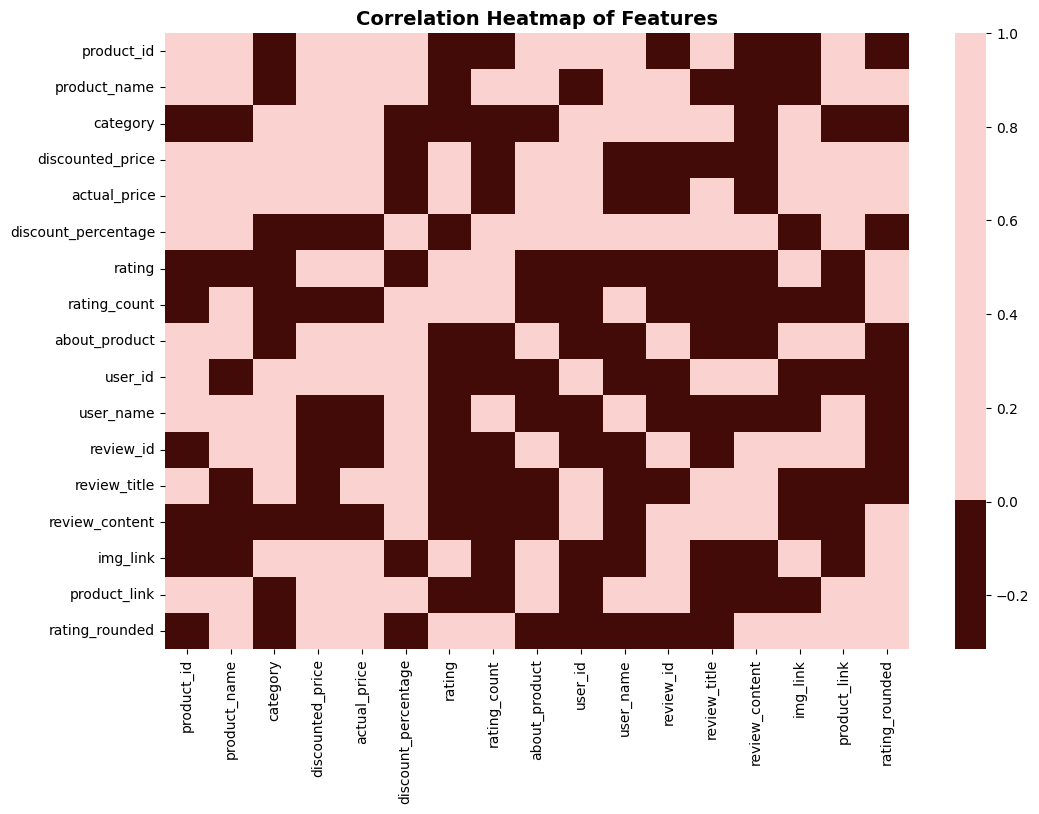

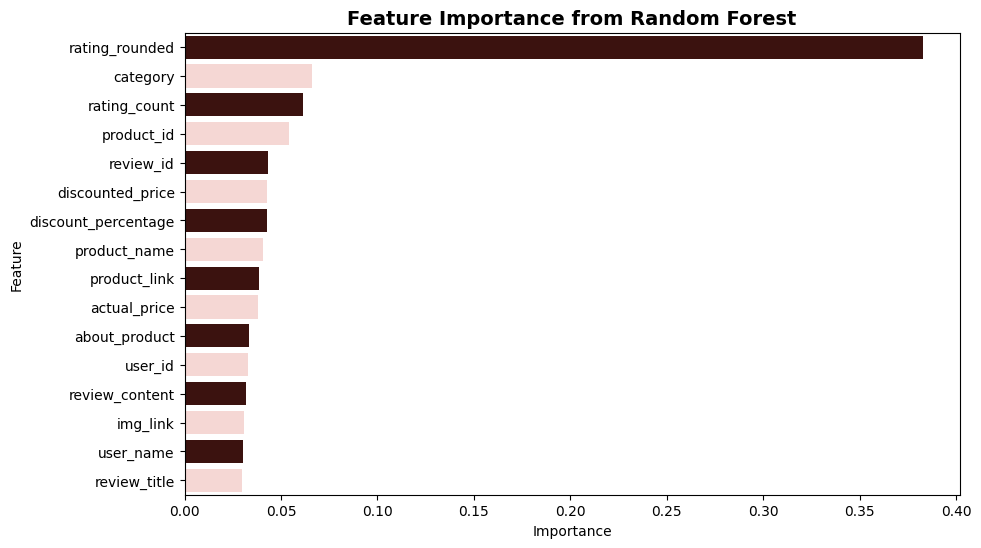

In [62]:
# ==============================
# 🔹 Correlation Heatmap
# ==============================
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap=palette, center=0)
plt.title("Correlation Heatmap of Features", fontsize=14, weight="bold")
plt.show()

# ==============================
# 🔹 Feature Importance using Random Forest
# ==============================

# Target variable example (you can change as needed, e.g., 'rating_rounded' or 'discounted_price')
target = "rating"
X = df.drop(columns=[target])
y = df[target]

# Fit Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame for visualization
feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette=palette)
plt.title("Feature Importance from Random Forest", fontsize=14, weight="bold")
plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #420b08; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:95%">Machine Learning: Predicting Sales (Discounted Price)</p>

<div style="background-color: #fad2cf; padding: 20px; border-radius: 15px; border: 5px solid #420b08; margin-top: 20px;">
  <p style="text-align: center; font-family: 'Arial', sans-serif; font-size: 28px; color: #420b08; font-weight: bold;">🎯 Problem Definition</p>

  <ul style="font-family: 'Georgia', serif; font-size: 15px; color: #420b08; margin-left: 20px;">
    <li>We want to predict the <strong>discounted price (Sales)</strong> of Amazon products based on product attributes.</li>
    <li><strong>Type:</strong> Regression Problem</li>
    <li><strong>Target Variable:</strong> <code>discounted_price</code></li>
    <li><strong>Evaluation Metrics:</strong> RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), R² Score</li>
  </ul>
</div>


In [63]:
# ==============================
# 🔹 Train-Test Split
# ==============================
X = df.drop(columns=["discounted_price"])   # Features
y = df["discounted_price"]                  # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (1172, 16)
Test shape: (293, 16)


<div style="font-family: 'Amiri'; color: #420b08; text-align: center; 
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; 
padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:95%">

  <p style="font-size: 2rem; margin: 0; font-weight: bold;">🏁 Baseline Models</p>
  <p style="font-size: 1.2rem; margin-top: 10px;">
    We start with simple models to set a performance benchmark:
    <br> 🔹 <b>Linear Regression</b>  
    <br> 🔹 <b>Decision Tree Regressor</b>  
  </p>

</div>

In [64]:
# Helper function for evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

baseline_results = {}

# Linear Regression
lr = LinearRegression()
baseline_results["Linear Regression"] = evaluate_model(lr, X_train, y_train, X_test, y_test)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
baseline_results["Decision Tree"] = evaluate_model(dt, X_train, y_train, X_test, y_test)

baseline_results

{'Linear Regression': {'RMSE': 0.2557387526183135,
  'MAE': 0.12046965367962462,
  'R2': 0.9376834643162564},
 'Decision Tree': {'RMSE': 0.24394505348876663,
  'MAE': 0.05502362103929686,
  'R2': 0.9432985389871851}}

<div style="font-family: 'Amiri'; color: #420b08; text-align: center; 
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; 
padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:95%">

  <p style="font-size: 2rem; margin: 0; font-weight: bold;">🌲 Advanced Models</p>
  <p style="font-size: 1.2rem; margin-top: 10px;">
    We now train more powerful models:
    <br>🔹 Random Forest Regressor  
    <br>🔹 Gradient Boosting Regressor  
    <br>🔹 XGBoost Regressor
  </p>

</div>

In [65]:
advanced_results = {}

# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
advanced_results["Random Forest"] = evaluate_model(rf, X_train, y_train, X_test, y_test)

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
advanced_results["Gradient Boosting"] = evaluate_model(gb, X_train, y_train, X_test, y_test)

# XGBoost
xgbr = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1)
advanced_results["XGBoost"] = evaluate_model(xgbr, X_train, y_train, X_test, y_test)

advanced_results

{'Random Forest': {'RMSE': 0.18965708630901595,
  'MAE': 0.04204423730131785,
  'R2': 0.9657272963820633},
 'Gradient Boosting': {'RMSE': 0.1742866558186865,
  'MAE': 0.040407925078603,
  'R2': 0.9710573368249396},
 'XGBoost': {'RMSE': 0.16525316837816112,
  'MAE': 0.034520203054639965,
  'R2': 0.9739798493518348}}

<div style="font-family: 'Amiri'; color: #420b08; text-align: center; 
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; 
padding: 5px; border-radius: 20px; border: 8px solid #420b08; width:95%">

  <p style="font-size: 1.5rem; margin: 0; font-weight: bold;">🔍 Model Evaluation & Comparison</p>
  <p style="font-size: 1.4rem; margin-top: 10px;">We will compare models on RMSE, MAE, and R² score.</p>

</div>

,RMSE,MAE,R2
XGBoost,0.165253,0.034520,0.973980
Gradient Boosting,0.174287,0.040408,0.971057
Random Forest,0.189657,0.042044,0.965727
Decision Tree,0.243945,0.055024,0.943299
Linear Regression,0.255739,0.120470,0.937683


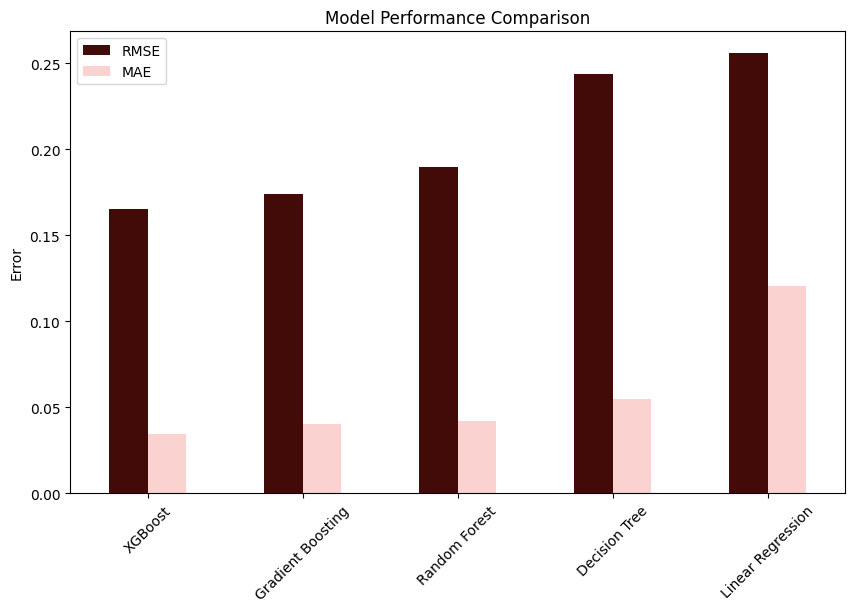

In [66]:
# Combine results
results_df = pd.DataFrame(baseline_results).join(pd.DataFrame(advanced_results))

# Transpose for readability
results_df = results_df.T.sort_values("RMSE")
display(results_df)

# Plot comparison
results_df[["RMSE","MAE"]].plot(kind="bar", figsize=(10,6), rot=45, color=palette)
plt.title("Model Performance Comparison")
plt.ylabel("Error")
plt.show()

<div style="font-family: 'Amiri'; color: #420b08; text-align: center; 
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; 
padding: 5px; border-radius: 20px; border: 8px solid #420b08; width:95%">

  <p style="font-size: 1.5rem; margin: 0; font-weight: bold;">📊 Residual Analysis</p>
  <p style="font-size: 1.4rem; margin-top: 10px;">To check how well the best model performs, we analyze residuals.</p>

</div>

Best Model: XGBoost


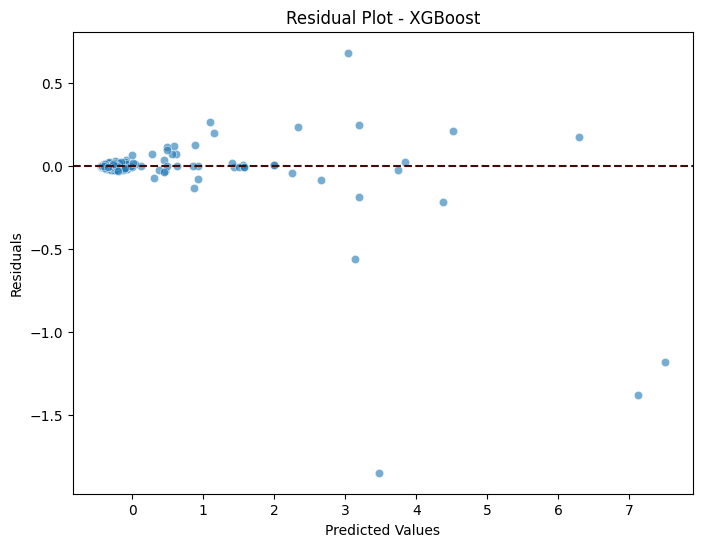

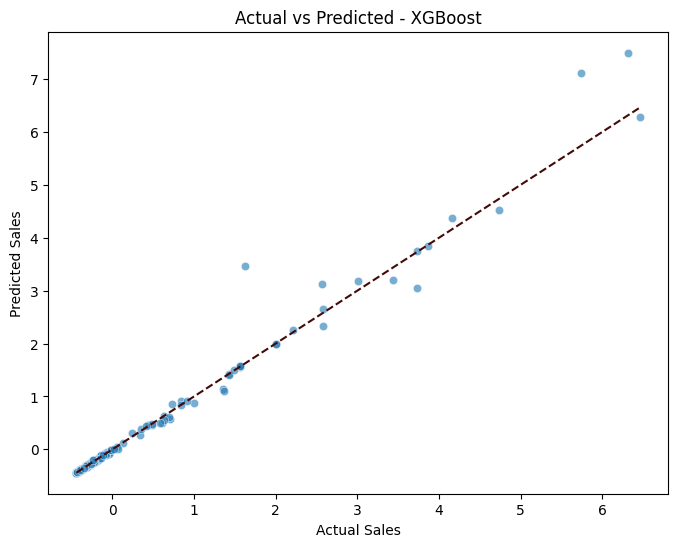

In [67]:
# Pick best model (lowest RMSE)
best_model_name = results_df.index[0]
print(f"Best Model: {best_model_name}")

# Train again
best_model = {"Random Forest": rf, "Gradient Boosting": gb, "XGBoost": xgbr,
              "Linear Regression": lr, "Decision Tree": dt}[best_model_name]
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color="#420b08", linestyle="--")
plt.title(f"Residual Plot - {best_model_name}")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="#420b08", linestyle="--")
plt.title(f"Actual vs Predicted - {best_model_name}")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

<div style="background-color: #fad2cf; padding: 20px; border-radius: 15px; border: 5px solid #420b08; margin-top: 20px;">
  <p style="text-align: center; font-family: 'Arial', sans-serif; font-size: 30px; color: #420b08; font-weight: bold;">📝 Observations from Model Performance</p>
  
  <ul style="font-family: 'Georgia', serif; font-size: 14px; color: #420b08; margin-left: 20px;">
    
  <li><strong>Linear Regression</strong>  
   <ul>
     <li>Worked as a quick baseline.</li>
     <li>RMSE = 0.25 and R² ≈ 0.94 → good but not the best.</li>
     <li>Struggled to capture complex non-linear patterns in data.</li>
   </ul>
  </li>

  <li><strong>Decision Tree</strong>  
   <ul>
     <li>Improved compared to Linear Regression (lower RMSE = 0.24).</li>
     <li>However, prone to overfitting on training data.</li>
     <li>Works better for feature splits but not stable for unseen data.</li>
   </ul>
  </li>

  <li><strong>Random Forest</strong>  
   <ul>
     <li>Big improvement (RMSE = 0.19, R² ≈ 0.97).</li>
     <li>Ensemble method reduces overfitting and captures patterns better.</li>
     <li>Stable and strong performance.</li>
   </ul>
  </li>

  <li><strong>Gradient Boosting</strong>  
   <ul>
     <li>Even better than Random Forest (RMSE = 0.17, R² ≈ 0.97).</li>
     <li>Handles bias and variance trade-off very well.</li>
     <li>More robust and consistent predictions.</li>
   </ul>
  </li>

  <li><strong>XGBoost</strong>  
   <ul>
     <li>Best performing model (RMSE = 0.16, R² ≈ 0.974).</li>
     <li>Lowest error and highest accuracy among all models.</li>
     <li>Clearly the most reliable model for predicting <code>discounted_price</code>.</li>
   </ul>
  </li>
    
  </ul>

  <p style="font-family: 'Georgia', serif; font-size: 15px; color: #420b08; margin-top: 15px;">
  ✅ <strong>Final Insight:</strong> The problem is a <strong>regression task</strong>, and <strong>XGBoost</strong> emerges as the best model for predicting product sales (<code>discounted_price</code>).  
  It captures complex relationships in data, achieves the lowest RMSE, and explains ~97% of the variance in the target variable.
  </p>
</div>


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #420b08; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #fad2cf; padding: 20px; border-radius: 20px; border: 8px solid #420b08; width:95%">Thank You</p>